In [2]:
import torch
import torch.nn as nn

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 256)
    self.fc2 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x
  
  def predict(self, x):
    with torch.no_grad():
      x = self.forward(x)
      return torch.argmax(x, 1)

In [1]:
from torchvision import datasets, transforms

# 加载训练数据集
train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transforms.ToTensor())

# 加载测试数据集
test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transforms.ToTensor())

In [43]:
from torch.utils.data import DataLoader

# 定义训练数据加载器
train_loader = DataLoader(
    dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(
    dataset=test_dataset, batch_size=64, shuffle=False)

net = Net()
# weights = torch.ones(10)
# weights[5] = 2.0  # 为数字5赋予更高的权重
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
for epoch in range(10):
  for i, (images, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    outputs = net(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if (i + 1) % 100 == 0:
      print('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f'
            % (epoch + 1, 5, i + 1, len(train_dataset) // 64, loss.item()))

Epoch [1/5], Iter [100/937] Loss: 0.2297
Epoch [1/5], Iter [200/937] Loss: 0.2404
Epoch [1/5], Iter [300/937] Loss: 0.2406
Epoch [1/5], Iter [400/937] Loss: 0.2902
Epoch [1/5], Iter [500/937] Loss: 0.2470
Epoch [1/5], Iter [600/937] Loss: 0.0570
Epoch [1/5], Iter [700/937] Loss: 0.1604
Epoch [1/5], Iter [800/937] Loss: 0.0573
Epoch [1/5], Iter [900/937] Loss: 0.1871
Epoch [2/5], Iter [100/937] Loss: 0.0702
Epoch [2/5], Iter [200/937] Loss: 0.1708
Epoch [2/5], Iter [300/937] Loss: 0.1864
Epoch [2/5], Iter [400/937] Loss: 0.0392
Epoch [2/5], Iter [500/937] Loss: 0.1169
Epoch [2/5], Iter [600/937] Loss: 0.0889
Epoch [2/5], Iter [700/937] Loss: 0.0444
Epoch [2/5], Iter [800/937] Loss: 0.2079
Epoch [2/5], Iter [900/937] Loss: 0.0279
Epoch [3/5], Iter [100/937] Loss: 0.0690
Epoch [3/5], Iter [200/937] Loss: 0.0860
Epoch [3/5], Iter [300/937] Loss: 0.0514
Epoch [3/5], Iter [400/937] Loss: 0.0802
Epoch [3/5], Iter [500/937] Loss: 0.0768
Epoch [3/5], Iter [600/937] Loss: 0.1271
Epoch [3/5], Ite

In [41]:
# 保存后加载模型
torch.save(net.state_dict(), 'model_five_2.0.pth')
# net = Net()
# net.load_state_dict(torch.load('model.pth'))

Python(78748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


{0: 9, 1: 10, 2: 18, 3: 16, 4: 34, 5: 22, 6: 16, 7: 21, 8: 16, 9: 31}
error-count: 193
Accuracy of the network on the 10000 test images: 98.07%


<BarContainer object of 10 artists>

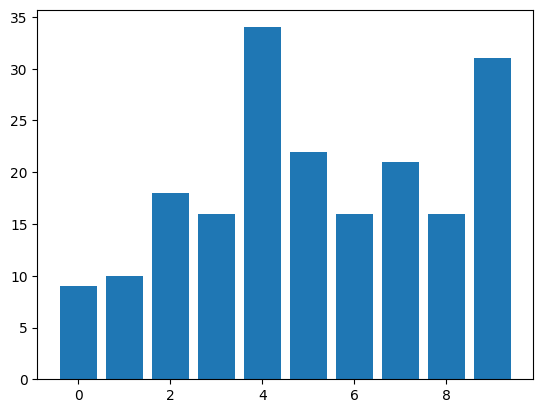

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from PIL import Image
import os

# 测试模型
net.eval()  # 切换到评估模式
with torch.no_grad():
  correct = 0
  total = 0
  """ 统计每个数字的错误次数 """
  error_count_dict = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0
  }

  for batch_index, (images, labels) in enumerate( test_loader):
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    error_index = np.where((predicted == labels).numpy() ==  False)[0]
    for index in error_index:
      error_count_dict[labels[index].item()] += 1
      img = images[index].squeeze().numpy() * 255
      img = Image.fromarray(img.astype('uint8'))
      img_dir = os.path.join(f'./misclassified_images/{labels[index]}')
      if not os.path.exists(img_dir):
        os.makedirs(img_dir)
      img.save(os.path.join(
          img_dir, f'{predicted[index]}_batch{batch_index}_index{index}.png'))
      
pprint(error_count_dict)
print('error-count:', sum(error_count_dict.values()))
print('Accuracy of the network on the 10000 test images: {:.2f}%'.format(100 * correct / total))

# 将每个数字的错误次数绘制为柱状图
plt.bar(error_count_dict.keys(), error_count_dict.values())